In [102]:
import pandas as pd
from pathlib import Path
import numpy as np
import matplotlib.pyplot as plt

path = Path('C:/Users/a.fedosov/OneDrive - Hyva Global/Desktop/repo/sales.xlsx')
df = pd.read_excel(path)
df['Date'] = pd.to_datetime(df['Date'])
df.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,2019-01-05,13:08:00,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,2019-03-08,10:29:00,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,2019-03-03,13:23:00,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,2019-01-27,20:33:00,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2019-02-08,10:37:00,Ewallet,604.17,4.761905,30.2085,5.3


Checking for NANs

In [103]:
nan_df = df[df.isna().any(axis=1)]
nan_df

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating


##### What are the most common ways of payment?

<AxesSubplot:xlabel='Payment'>

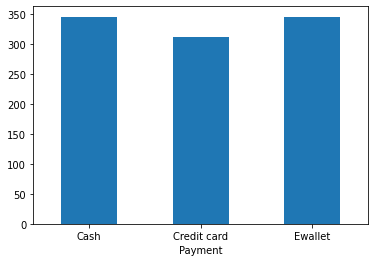

In [104]:
common_payments = df.groupby(['Payment'])['Payment'].count()
common_payments.plot.bar(rot=0)

Payment types do not vary much
##### Is there a relation between customer type and rating?

In [105]:
customer = df.groupby(['Customer type']).agg({'Rating':np.average})
customer

,Rating
Customer type,
Member,6.940319
Normal,7.005210


Memberships seem to not affect ratings
##### Does customer type influence total sales?

<AxesSubplot:xlabel='Customer type'>

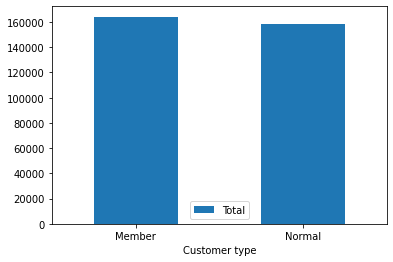

In [106]:
customer_2 = df.groupby(['Customer type']).agg({'Total':'sum'})
customer_2.plot.bar(rot=0)

##### What time of day to people purchase which type of product?

In [109]:
df.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,2019-01-05,13:08:00,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,2019-03-08,10:29:00,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,2019-03-03,13:23:00,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,2019-01-27,20:33:00,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2019-02-08,10:37:00,Ewallet,604.17,4.761905,30.2085,5.3
